# The purpose is to show the BC95

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[5],'templates')


In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [13]:
obj_headers = []
obj_files = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [14]:
obj_names = []
index=0
for hdr in obj_headers: 
        obj_name=obj_headers[index]['TARGETID']
        obj_names.append(obj_name)
        index+=1


In [15]:
print obj_names

['bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_a', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_b', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_c', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_d', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_e', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_f', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g', 'bc95_g']


In [16]:
print obj_files

['bc95_a_10E5.fits', 'bc95_a_10E6.fits', 'bc95_a_10E7.fits', 'bc95_a_10E8.fits', 'bc95_a_10E9.fits', 'bc95_a_25E5.fits', 'bc95_a_25E6.fits', 'bc95_a_50E5.fits', 'bc95_a_50E6.fits', 'bc95_a_50E7.fits', 'bc95_a_50E8.fits', 'bc95_a_76E5.fits', 'bc95_b_10E5.fits', 'bc95_b_10E6.fits', 'bc95_b_10E7.fits', 'bc95_b_10E8.fits', 'bc95_b_10E9.fits', 'bc95_b_25E5.fits', 'bc95_b_25E6.fits', 'bc95_b_50E5.fits', 'bc95_b_50E6.fits', 'bc95_b_50E7.fits', 'bc95_b_50E8.fits', 'bc95_b_76E5.fits', 'bc95_c_10E5.fits', 'bc95_c_10E6.fits', 'bc95_c_10E7.fits', 'bc95_c_10E8.fits', 'bc95_c_10E9.fits', 'bc95_c_25E5.fits', 'bc95_c_25E6.fits', 'bc95_c_50E5.fits', 'bc95_c_50E6.fits', 'bc95_c_50E7.fits', 'bc95_c_50E8.fits', 'bc95_c_76E5.fits', 'bc95_d_10E5.fits', 'bc95_d_10E6.fits', 'bc95_d_10E7.fits', 'bc95_d_10E8.fits', 'bc95_d_10E9.fits', 'bc95_d_25E5.fits', 'bc95_d_25E6.fits', 'bc95_d_50E5.fits', 'bc95_d_50E6.fits', 'bc95_d_50E7.fits', 'bc95_d_50E8.fits', 'bc95_d_76E5.fits', 'bc95_e_10E5.fits', 'bc95_e_10E6.fits',

In [17]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [18]:
OBJDict= {}
index=0
for obj,thefile in objames_and_objfiles:
    print obj, index,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 
    index+=1

bc95_a 0 : 
bc95_a_10E5.fits
bc95_a 1 : 
bc95_a_10E6.fits
bc95_a 2 : 
bc95_a_10E7.fits
bc95_a 3 : 
bc95_a_10E8.fits
bc95_a 4 : 
bc95_a_10E9.fits
bc95_a 5 : 
bc95_a_25E5.fits
bc95_a 6 : 
bc95_a_25E6.fits
bc95_a 7 : 
bc95_a_50E5.fits
bc95_a 8 : 
bc95_a_50E6.fits
bc95_a 9 : 
bc95_a_50E7.fits
bc95_a 10 : 
bc95_a_50E8.fits
bc95_a 11 : 
bc95_a_76E5.fits
bc95_b 12 : 
bc95_b_10E5.fits
bc95_b 13 : 
bc95_b_10E6.fits
bc95_b 14 : 
bc95_b_10E7.fits
bc95_b 15 : 
bc95_b_10E8.fits
bc95_b 16 : 
bc95_b_10E9.fits
bc95_b 17 : 
bc95_b_25E5.fits
bc95_b 18 : 
bc95_b_25E6.fits
bc95_b 19 : 
bc95_b_50E5.fits
bc95_b 20 : 
bc95_b_50E6.fits
bc95_b 21 : 
bc95_b_50E7.fits
bc95_b 22 : 
bc95_b_50E8.fits
bc95_b 23 : 
bc95_b_76E5.fits
bc95_c 24 : 
bc95_c_10E5.fits
bc95_c 25 : 
bc95_c_10E6.fits
bc95_c 26 : 
bc95_c_10E7.fits
bc95_c 27 : 
bc95_c_10E8.fits
bc95_c 28 : 
bc95_c_10E9.fits
bc95_c 29 : 
bc95_c_25E5.fits
bc95_c 30 : 
bc95_c_25E6.fits
bc95_c 31 : 
bc95_c_50E5.fits
bc95_c 32 : 
bc95_c_50E6.fits
bc95_c 33 : 
bc95_c_

In [19]:
OBJDict

{'bc95_a': 'bc95_a_76E5.fits',
 'bc95_b': 'bc95_b_76E5.fits',
 'bc95_c': 'bc95_c_76E5.fits',
 'bc95_d': 'bc95_d_76E5.fits',
 'bc95_e': 'bc95_e_76E5.fits',
 'bc95_f': 'bc95_f_76E5.fits',
 'bc95_g': 'bc95_g_76E5.fits'}

## Plot the SED

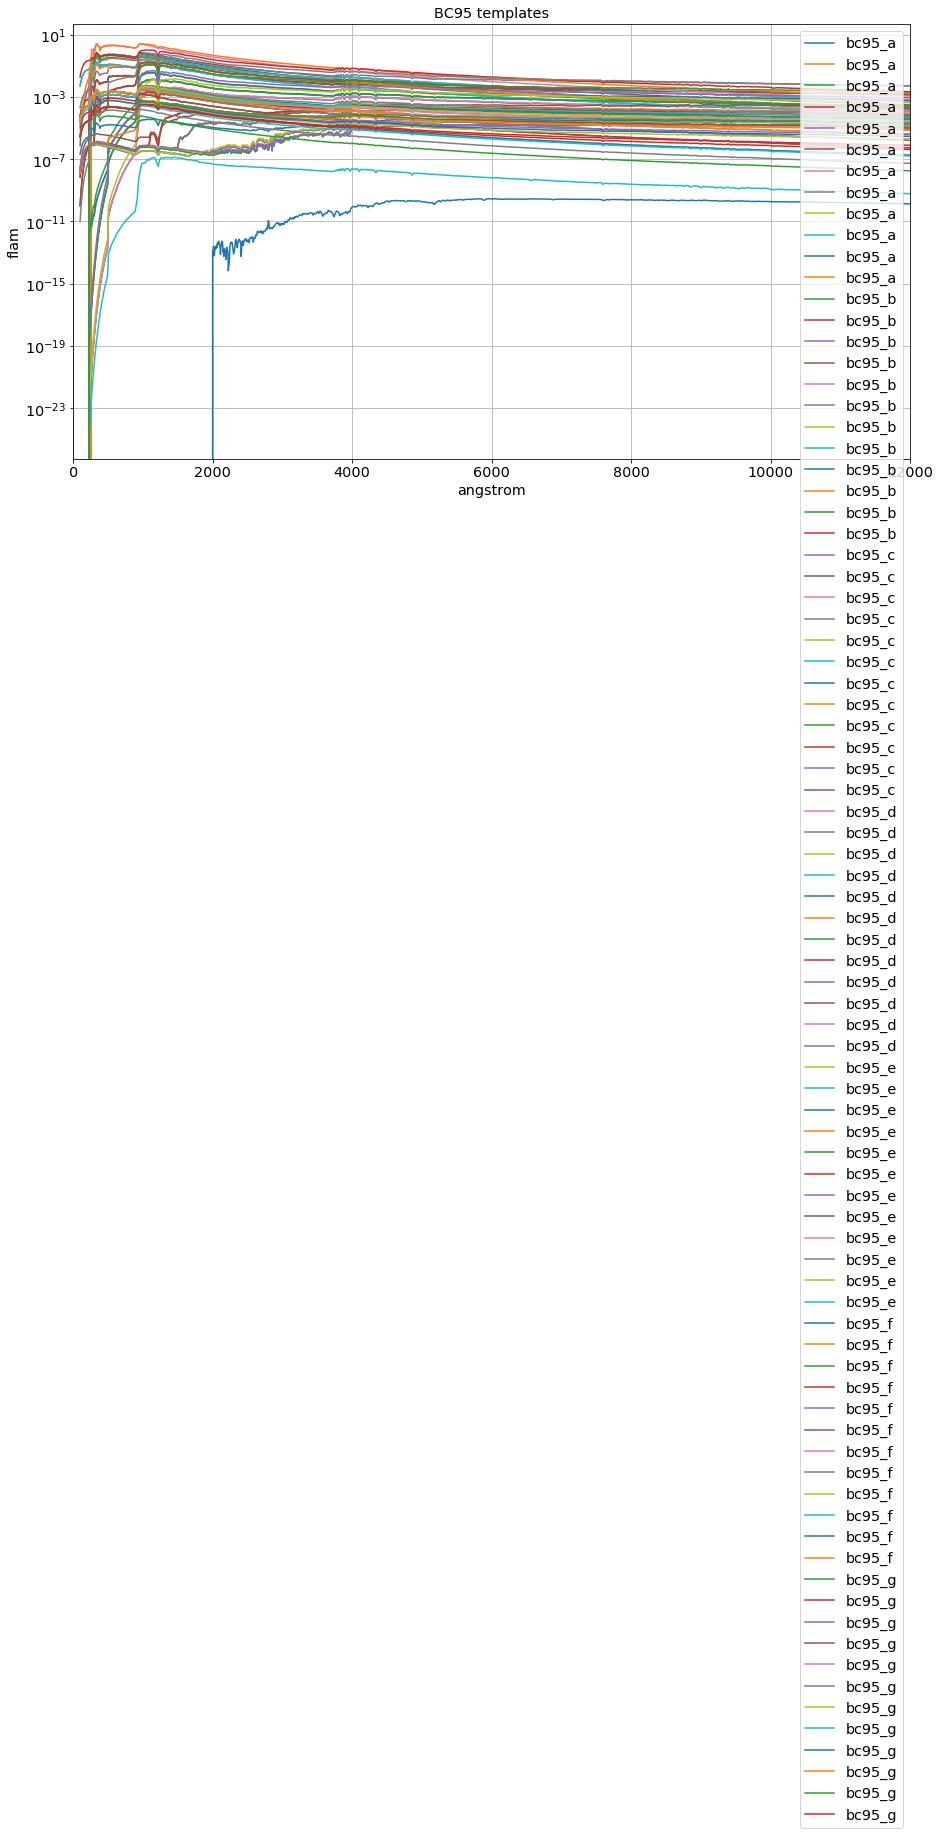

In [21]:
all_sed=[]
#for keyobj in OBJDict:
for obj,thefile in objames_and_objfiles:
    keyobj=obj
    #the_file=OBJDict[keyobj]
        
    #selected_file=the_file
    selected_file=thefile
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
     
    all_sed.append(sed)    
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("BC95 templates")
    plt.savefig("bc95.png")

In [ ]:
print len(all_sed)